In [1]:
pip install pytesseract==0.3.4

Note: you may need to restart the kernel to use updated packages.


In [73]:
from PIL import Image
from io import BytesIO
import cv2
import numpy as np
#import pytesseract as pyt
import matplotlib.pyplot as plt
import re

In [74]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = '/opt/homebrew/bin/tesseract' 

In [75]:
img = cv2.imread("/Users/shivanipatel/Downloads/archive/yolo x image/yolo x image/1.jpg")

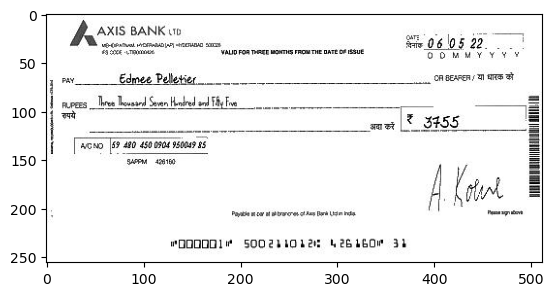

In [76]:
plt.imshow(img)

In [77]:
img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

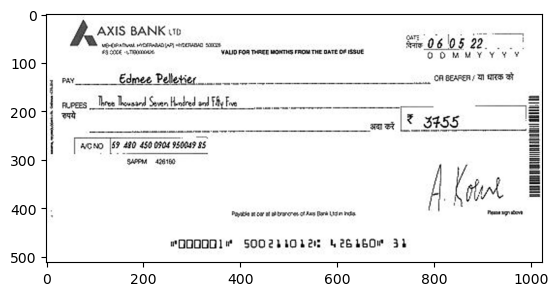

In [78]:
plt.imshow(img)

In [79]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

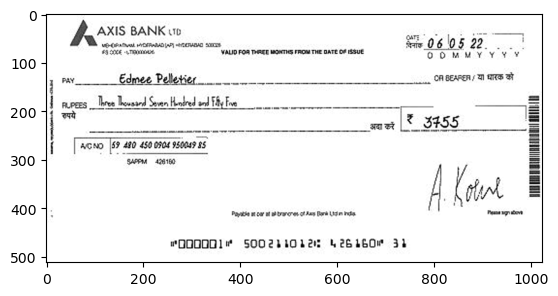

In [80]:
plt.imshow(img, cmap="gray")

In [81]:
eng_text = pytesseract.image_to_string(img, lang="eng")

In [82]:
eng_text

"I‘Axls BANK o\nVORIV I DFRARAD 7] *HTOWIAD 500008\n\n06!\n#5 5006 L TRONOUE VALID FOR THRET MONTIS FROM THE DATE OF ISSUE 'hw 2600.,5»423 Yoy\n! . y Peletier L cRGEER/ MRS R\n| mupems _ Thres Boussrd Soven Hondred sod TliyFne\nP 4\n|  amltass\n{\n\nAGNO |89 490 450 0704 950045 85\n\nSAPPM 48160\n\nPaythe W 0o 0 brar s ot A Bk LI et\n\n»000001w S002ii0k2n L2BA&Ow 31\n\nst"

In [83]:
# function to remove noise and unnecessary characters from string
def clean_text(eng_text):
    if eng_text != ' ' or eng_text != '  ' or eng_text != '':
        eng_text = re.sub('[^A-Za-z0-9-/,.() ]+', '', eng_text)
        eng_text = eng_text.strip()
        eng_text = re.sub(r'\s{2,}', ' ', eng_text)

    return eng_text

In [84]:
text_clean = clean_text(eng_text)

In [85]:
text_clean

'IAxls BANK oVORIV I DFRARAD 7 HTOWIAD 500008065 5006 L TRONOUE VALID FOR THRET MONTIS FROM THE DATE OF ISSUE hw 2600.,5423 Yoy . y Peletier L cRGEER/ MRS R mupems Thres Boussrd Soven Hondred sod TliyFneP 4 amltassAGNO 89 490 450 0704 950045 85SAPPM 48160Paythe W 0o 0 brar s ot A Bk LI et000001w S002ii0k2n L2BAOw 31st'

In [86]:
micr_img = img[420:,:]

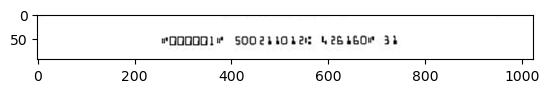

In [87]:
plt.imshow(micr_img, cmap="gray")

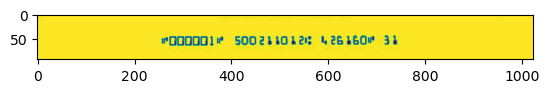

In [88]:
plt.imshow(micr_img)

In [89]:
text = pytesseract.image_to_string(micr_img, "eng")

In [90]:
text

'»000001w S002ii0k2n L2BA&Ow 31'

In [91]:
mcr_text=pytesseract.image_to_string(micr_img,lang='mcr')

In [92]:
mcr_text

'c000001c 5002110 12a 4 26160c 31'

In [93]:
e13bb_text=pytesseract.image_to_string(micr_img,lang='e13bb')

In [94]:
e13bb_text

'C000001C500211012A426160C31'

In [95]:
# function to remove noise and unnecessary characters from string
def clean_text(e13bb_text):
    if e13bb_text != ' ' or e13bb_text != '  ' or e13bb_text != '':
        e13bb_text = re.sub('[^A-Za-z0-9-/,.() ]+', '', e13bb_text)
        e13bb_text = e13bb_text.strip()
        e13bb_text = re.sub(r'\s{2,}', ' ', e13bb_text)

    return e13bb_text

In [96]:
e13bb_clean = clean_text(e13bb_text)

In [97]:
e13bb_clean

'C000001C500211012A426160C31'

In [98]:
import re

def extract_micr_line(text):
    # MICR lines are typically at the end of OCR text and consist of a sequence of numbers and control characters
    # The pattern looks for a sequence of characters that are common in MICR lines (C, A, numbers)
    # Adjust the pattern if your MICR lines have different characters
    micr_pattern = re.compile(r'C\d{6}C\d{9}A\d{6}C\d{2}')

    # Search for the pattern in the text
    match = micr_pattern.search(text.replace(" ", "").replace("\n", ""))
    if match:
        return match.group()
    else:
        return None


micr_line = extract_micr_line(e13bb_clean)
if micr_line:
    print("Extracted MICR Line:", micr_line)
else:
    print("No MICR line found.")


Extracted MICR Line: C000001C500211012A426160C31


In [99]:
def format_micr_line(micr_line):
    # Remove 'C' and 'A' characters and any other non-digit characters if needed
    formatted_micr = re.sub(r'[CA]', '', micr_line)
    return formatted_micr

formatted_micr = format_micr_line(micr_line)
print("Formatted MICR Code:", formatted_micr)


Formatted MICR Code: 00000150021101242616031


In [100]:
def parse_micr(micr_code):
    # Assuming the routing number is 9 digits, the account number is the next sequence,
    # and the check number is the last 4 digits (this might vary)
    
    # Remove non-digit characters if they are present
    micr_code = re.sub(r'\D', '', micr_code)
    
    # Extract the routing number (first 9 digits)
    routing_number = micr_code[:9]

    # Extract the check number (last 4 digits)
    check_number = micr_code[-4:]

    # Extract the account number (everything in between)
    account_number = micr_code[9:-4]

    return routing_number, account_number, check_number

routing_number, account_number, check_number = parse_micr(formatted_micr)

print("Routing Number:", routing_number)
print("Account Number:", account_number)
print("Check Number:", check_number)


Routing Number: 000001500
Account Number: 2110124261
Check Number: 6031


In [101]:
def format_micr_for_print(routing_number, account_number, check_number):
    # Create a formatted string with spaces between the MICR components
    # The number of spaces can be adjusted as per the typical format used in checks
    formatted_micr = "{} {} {}".format(routing_number, account_number, check_number)
    return formatted_micr

# Format for print
formatted_micr_line = format_micr_for_print(routing_number, account_number, check_number)
print(formatted_micr_line)


000001500 2110124261 6031


In [102]:
import pandas as pd

# Path to the CSV file
csv_file_path = '/Users/shivanipatel/Downloads/archive/yolo x image/micr_results.csv'  # Replace with the path to your CSV file

# Read the CSV file into a DataFrame
micr_df = pd.read_csv(csv_file_path)

# Assuming formatted_micr_line is your variable that contains the MICR line to check
#formatted_micr_line = "your_formatted_micr_line_here"  # Replace with your MICR line

# Check if the MICR line is present in the DataFrame
if formatted_micr_line in micr_df['Formatted_MICR_Line'].values:
    print("The formatted MICR line: ", formatted_micr_line ,"is present in the CSV file.")
else:
    print("The formatted MICR line: ", formatted_micr_line ," is not found in the CSV file.")


The formatted MICR line:  000001500 2110124261 6031 is present in the CSV file.
